In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pyhepmc
import itertools
import math
import uproot 


# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])

# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.labelpad'] = 9.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1.
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
mpl.rcParams['figure.figsize'] = 12, 6
mpl.rcParams['figure.dpi'] = 200

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

def fix_ax(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    return ax

In [10]:
#Useful constants
tm15fm2_to_nb = 1.e-8
tm38cm2_to_nb = 1.
GeVm2_to_nb = 389379.09

#GENIE total cross section
noah_xsec =  0.13645e-05#nb

noah_numevents = 200015

In [46]:
#Get Noah's events

probe_p4 = []
lepton_p4 = []
innuc_p4 = []
outnuc_p4 = []

with open('../C12_CC_1000.out', 'r') as file:
    #total_xsec_line = file.readline()
    for p1,p2,p3,p4 in itertools.zip_longest(*[file]*4):
       # print(p1)
        p1 = [float(x) for x in p1.split()]
        p2 = [float(x) for x in p2.split()]
        p3 = [float(x) for x in p3.split()]
        p4 = [float(x) for x in p4.split()]
        probe_p4.append(p1)
        lepton_p4.append(p2)
        innuc_p4.append(p3)
        outnuc_p4.append(p4)
        

In [18]:
#Get Noah's events

intf_probe_p4_n = []
intf_lepton_p4_n = []
intf_innuc_p4_n = []
intf_outnuc_p4_n = []
intf_spec_p4_n = []
intf_probe_p4_p = []
intf_lepton_p4_p = []
intf_innuc_p4_p = []
intf_outnuc_p4_p = []
intf_spec_p4_p = []
intf_spec_pdg = []


with open('C12_CCintf_1000.out', 'r') as file:
    #total_xsec_line = file.readline()
    for p1,p2,p3,p4,p5,p6 in itertools.zip_longest(*[file]*6):
       # print(p1)
        p1 = [float(x) for x in p1.split()[1:5]]
        p2 = [float(x) for x in p2.split()[1:5]]
        p3 = [float(x) for x in p3.split()[1:5]]
        p4 = [float(x) for x in p4.split()[1:5]]
        
        spec_pdg = int(p5.split()[0])
        intf_spec_pdg.append(spec_pdg)
        p5 = [float(x) for x in p5.split()[1:5]]
        
        if spec_pdg == 2212:
            intf_probe_p4_p.append(p1)
            intf_lepton_p4_p.append(p2)
            intf_innuc_p4_p.append(p3)
            intf_outnuc_p4_p.append(p4)
            intf_spec_p4_p.append(p5)
            
        if spec_pdg == 2112:
            intf_probe_p4_n.append(p1)
            intf_lepton_p4_n.append(p2)
            intf_innuc_p4_n.append(p3)
            intf_outnuc_p4_n.append(p4)
            intf_spec_p4_n.append(p5)
            

intf_probe_p4 = intf_probe_p4_p + intf_probe_p4_n
intf_lepton_p4 = intf_lepton_p4_p + intf_lepton_p4_n

In [4]:
def get_double_diff_xsec(probeP4, leptonP4, angles, delta, xsec, events, bins, low_bins, high_bins):
    
    double_dif_angles = []
    weights = []
    
    for angle,low_bin,high_bin in zip(angles,low_bins,high_bins):
        double_dif = []

        high_cos = math.cos((angle + delta)*np.pi/180)
        low_cos = math.cos((angle - delta)*np.pi/180)
        delta_cos = (low_cos - high_cos)

        for probe,lep in zip(probeP4, leptonP4):
            omega = probe[0] - lep[0]
            probe_3 = [probe[1], probe[2], probe[3]]
            lep_3 = [lep[1], lep[2], lep[3]]
            cos_theta = np.dot(lep_3,probe_3)/(np.sqrt(np.dot(lep_3,lep_3))*np.sqrt(np.dot(probe_3,probe_3)))
            if cos_theta < low_cos and cos_theta > high_cos:
                double_dif.append(omega)

        bin_width = delta_cos*(high_bin - low_bin)/bins

        double_dif = np.array(double_dif)
        double_dif_angles.append(double_dif)
        weight = (xsec)/events/bin_width
        weights.append(weight)
    
    return double_dif_angles,weights


In [20]:
numbins = 20
omegalows = [30]
omegahighs = [300]

dtheta = 1.0
angles = [30]

noah_dsig_n,noah_weights_n = get_double_diff_xsec(intf_probe_p4_n, intf_lepton_p4_n, angles, dtheta, noah_xsec, noah_numevents, numbins, omegalows, omegahighs)
noah_dsig_p,noah_weights_p = get_double_diff_xsec(intf_probe_p4_p, intf_lepton_p4_p, angles, dtheta, noah_xsec, noah_numevents, numbins, omegalows, omegahighs)

noah_dsig, noah_weights = get_double_diff_xsec(intf_probe_p4, intf_lepton_p4, angles, dtheta, noah_xsec, noah_numevents, numbins, omegalows, omegahighs)

In [8]:
intf_theory_df = pd.read_csv('/Users/noah/Physics/Fermilab/Interference/EW_Scattering/C12_QMC_dipole_EW_v2_2b_1000_30p0.out',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') 

intf_theory_df.columns = ['w', '1b','2b']

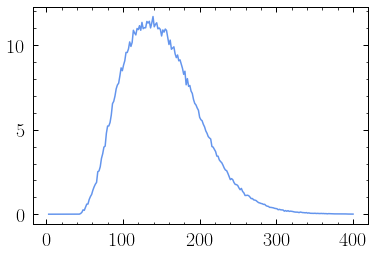

In [9]:
plt.plot(intf_theory_df['w'], intf_theory_df['2b'])

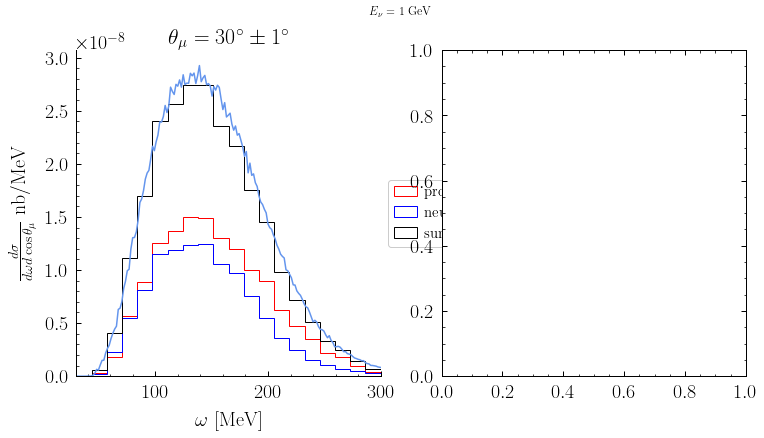

In [29]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
for i,angle in enumerate(angles):

    ax[i].hist(noah_dsig_p[i], bins=numbins, range=(omegalows[i],omegahighs[i]),weights=np.ones_like(noah_dsig_p[i])*noah_weights_p[i],histtype='step',color='red',label='proton spectator')
    
    ax[i].hist(noah_dsig_n[i], bins=numbins, range=(omegalows[i],omegahighs[i]),weights=np.ones_like(noah_dsig_n[i])*noah_weights_n[i],histtype='step',color='blue',label='neutron spectator')
    
    ax[i].hist(noah_dsig[i], bins=numbins, range=(omegalows[i],omegahighs[i]),weights=np.ones_like(noah_dsig[i])*noah_weights[i],histtype='step',color='black',label='summed')
       
    ax[i].set_xlim(omegalows[i],omegahighs[i])
    ax[i].set_xlabel(r'$\omega$ [MeV]')
    ax[i] = fix_ax(ax[i])
    
ax[0].plot(intf_theory_df['w'], intf_theory_df['2b']*tm15fm2_to_nb/4)


ax[0].set_ylabel(r'$\frac{d\sigma}{d\omega d\cos\theta_{\mu}}$ $\rm{nb}/\rm{MeV}$')
        
ax[0].set_title(r'$\theta_{\mu} = {30}^{\circ}\pm 1^{\circ}$',fontsize=22)
ax[0].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 15})

fig.suptitle(r'$E_{\nu} = 1$ GeV')
plt.show()

In [21]:
def get_transverse_proj(vec1,vec2):
    parallel_proj = np.dot(vec1,vec2) / np.linalg.norm(vec2) * (vec2/np.linalg.norm(vec2))
    
    trans_proj = vec1 - parallel_proj
    
    return trans_proj


def get_TKI_xsec(conversion,xsec, events, outnuc4, lep4, probe4, bin_alphaT, bin_PT, low_binalphaT, high_binalphaT, low_binPT, high_binPT):
    
    moms = []
    alphaT = []
    
    for nuc,lep,probe in zip(outnuc4,lep4,probe4):
        
        probe_mom = np.array([probe[1],probe[2],probe[3]])
        
        nuc_mom = np.array([nuc[1], nuc[2], nuc[3]])
        nuc_pt = get_transverse_proj(nuc_mom,probe_mom)

        lep_mom = np.array([lep[1], lep[2], lep[3]])
        lep_pt = get_transverse_proj(lep_mom,probe_mom)
        lep_pt_mag = np.linalg.norm(lep_pt)

        pt_mom = lep_pt + nuc_pt

        pt = np.linalg.norm(pt_mom)

        lepdotpt = np.dot(lep_mom,pt_mom)

        moms.append(pt)
        if np.abs(((-lepdotpt) / (lep_pt_mag * pt)) > 1.):
            print('shit')
        alphaT_val = math.acos( (-lepdotpt) / (lep_pt_mag * pt)) * 180./np.pi
        if alphaT_val > 180.:
            alphaT_val -= 180.
        if alphaT_val < 0.:
            alphaT_val += 180.

        alphaT.append(alphaT_val)
        
    TKI = [moms,alphaT]
        
    PTbin_width = (high_binPT - low_binPT)/bin_PT
    alphaTbin_width = (high_binalphaT - low_binalphaT)/bin_alphaT

    mom_weight = conversion*(xsec)/events/PTbin_width
    alphaT_weight = conversion*(xsec)/events/alphaTbin_width

    TKI_weight = [mom_weight, alphaT_weight]

    return TKI, TKI_weight

In [22]:
TKI, TKI_weight = get_TKI_xsec(1.,noah_xsec, noah_numevents, intf_outnuc_p4,intf_lepton_p4,intf_probe_p4, 40, 40, 0, 180, 0, 800) 


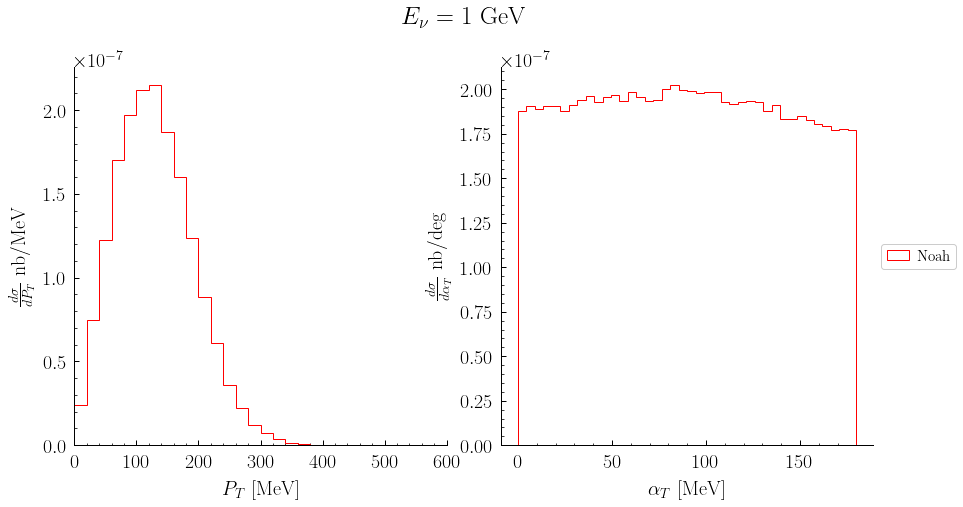

In [23]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
fig.tight_layout()

ax[0].hist(TKI[0], bins = 40, range = (0,800), weights = np.ones_like(TKI[0])*TKI_weight[0],histtype='step',label='Noah',color='red')
ax[0].set_ylabel(r'$\frac{d\sigma}{dP_{T}}$ $\rm{nb}/\rm{MeV}$')
ax[0].set_xlabel(r'$P_{T}$ [MeV]')
ax[0].set_xlim([0,600])

ax[0] = fix_ax(ax[0])


ax[1].hist(TKI[1], bins = 40, range = (0,180), weights = np.ones_like(TKI[1])*TKI_weight[1],histtype='step',label='Noah',color='red')
ax[1].set_ylabel(r'$\frac{d\sigma}{d\alpha_{T}}$ $\rm{nb}/\rm{deg}$')
ax[1].set_xlabel(r'$\alpha_{T}$ [MeV]')

ax[1] = fix_ax(ax[1])


ax[1].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 15})

fig.suptitle(r'$E_{\nu} = 1$ GeV',fontsize=25,y=1.1)
plt.show()


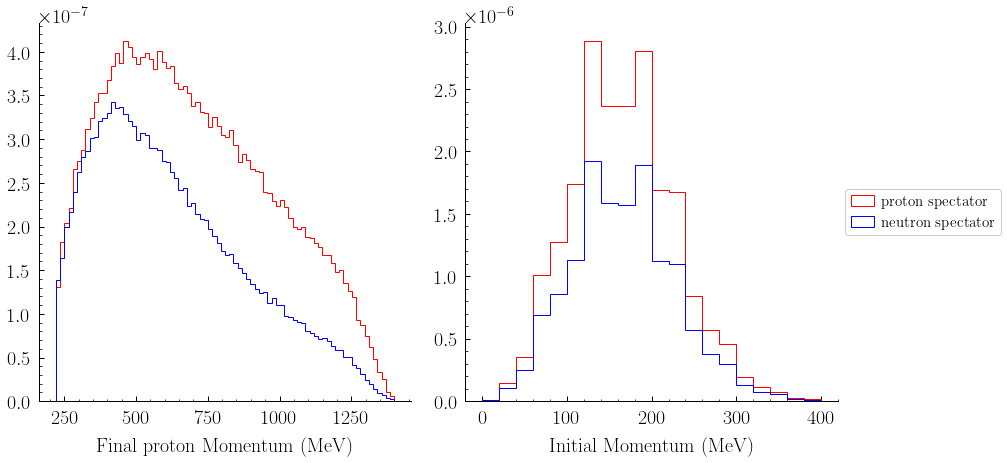

In [33]:
proton_mom_nspec = []
proton_mom_pspec = []
neutron_mom_nspec = []
neutron_mom_pspec = []

for prot_mom, neutron_mom, spec_pdg in zip(intf_outnuc_p4, intf_innuc_p4, intf_spec_pdg):
    if spec_pdg == 2212:
        p_mom = np.sqrt(prot_mom[1]**2 + prot_mom[2]**2 + prot_mom[3]**2)
        n_mom = np.sqrt(neutron_mom[1]**2 + neutron_mom[2]**2 + neutron_mom[3]**2)
        proton_mom_pspec.append(p_mom)
        neutron_mom_pspec.append(n_mom)
    if spec_pdg == 2112:
        p_mom = np.sqrt(prot_mom[1]**2 + prot_mom[2]**2 + prot_mom[3]**2)
        n_mom = np.sqrt(neutron_mom[1]**2 + neutron_mom[2]**2 + neutron_mom[3]**2)
        proton_mom_nspec.append(p_mom)
        neutron_mom_nspec.append(n_mom)
        

fig,ax = plt.subplots(1,2,figsize=(12,6))
fig.tight_layout()

ax[0].hist(proton_mom_pspec,bins = 80,range=(220,1400),weights = np.ones_like(proton_mom_pspec)*noah_xsec/noah_numevents,color='red',histtype='step',label='proton spectator')
ax[0].hist(proton_mom_nspec,bins = 80,range=(220,1400),weights = np.ones_like(proton_mom_nspec)*noah_xsec/noah_numevents,color='blue',histtype='step',label='neutron spectator')

ax[0] = fix_ax(ax[0])


ax[1].hist(neutron_mom_pspec,bins = 20,range=(0,400),weights = np.ones_like(neutron_mom_pspec)*noah_xsec/noah_numevents,color='red',histtype='step',label='proton spectator')
ax[1].hist(neutron_mom_nspec,bins = 20,range=(0,400),weights = np.ones_like(neutron_mom_nspec)*noah_xsec/noah_numevents,color='blue',histtype='step',label='neutron spectator')

ax[1] = fix_ax(ax[1])
#ax[1].set_yscale('log')
#ax[1].set_ylim([1e-8,8e-6])


ax[1].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 15})

ax[0].set_xlabel('Final proton Momentum (MeV)')
ax[1].set_xlabel('Initial Momentum (MeV)')
plt.show()


In [37]:
proton_angle_nspec = []
proton_angle_pspec = []

for prot_mom, probe_mom, spec_pdg in zip(intf_outnuc_p4, intf_probe_p4, intf_spec_pdg):
    probe_3 = [probe_mom[1], probe_mom[2], probe_mom[3]]
    proton_3 = [prot_mom[1], prot_mom[2], prot_mom[3]]
    
    cos_theta = np.dot(proton_3,probe_3)/(np.sqrt(np.dot(proton_3,proton_3))*np.sqrt(np.dot(probe_3,probe_3)))
    theta = np.arccos(cos_theta)*180./np.pi
        
    
    if spec_pdg == 2212:
        proton_angle_pspec.append(theta)
    if spec_pdg == 2112:
        proton_angle_nspec.append(theta)

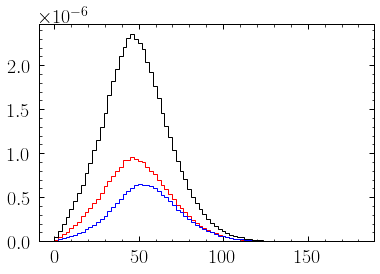

In [48]:
plt.hist(proton_angle_pspec,bins = 80,range=(0,180),weights = np.ones_like(proton_mom_pspec)*noah_xsec/noah_numevents,color='red',histtype='step',label='proton spectator')
plt.hist(proton_angle_nspec,bins = 80,range=(0,180),weights = np.ones_like(proton_mom_nspec)*noah_xsec/noah_numevents,color='blue',histtype='step',label='neutron spectator')

plt.hist(proton_angle,bins = 80, range=(0,180),weights = np.ones_like(proton_angle)*noah_xsec/noah_numevents, color='black',histtype='step')

plt.show()

In [70]:
def Emu(t,m):
    return t + m

def Pmu(E,m):
    return np.sqrt(E**2 - m**2)

def Q2(t,m,E,cos):
    val = 2*E*Emu(t,m)*(1. - cos*Pmu(Emu(t,m),m)/Emu(t,m)) - m**2
    return val

In [85]:
# Read in miniboone flux
mb = pd.read_csv('/Users/noah/Desktop/flux_nu.dat',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python',header=None) 
mb.columns = ['Elo','Ehi','numu','b','c','d']
mb['E'] = (mb['Ehi'] + mb['Elo'])/2.
dE = mb['E'][1] - mb['E'][0]

norm = mb['numu'].sum() * dE
mb['numu'] = mb['numu']/norm

In [95]:
def integrate_flux(Ev,tmu,flux,cos,m):
    avgQ2_arr = []
    for t in tmu:
        avgQ2 = 0
        for E,phi in zip(Ev, flux):
            if E >= t + m:
                avgQ2 += Q2(t,m,E,cos)*phi*dE
        avgQ2_arr.append(avgQ2)
        
    return avgQ2_arr
 

In [104]:
m = .105
cos = [.25, .55, .85]
ts = [np.linspace(0,.6,500), np.linspace(0,1.,500), np.linspace(0,1.5,500)]
avgQ2 = [integrate_flux(mb['E'],t_array,mb['numu'],c, m) for c,t_array in zip(cos,ts)]

In [119]:
t0 = -0.5
tcut = 0.18
a = [.725,-1.63,.17]
MA = 1.0

def z(Q2,tzero,tc):
    return ( np.sqrt(tc + Q2) - np.sqrt(tc - tzero) )/( np.sqrt(tc + Q2) + np.sqrt(tc - tzero) )

def FA_lattice(Q2):
    fa = 0
    for i in range(0,3):
        fa = fa + a[i]*z(Q2,t0,tcut)**i
    return -fa

def FA_dipole(Q2):
    return -1.2723/(1.0 + Q2/MA**2)**2

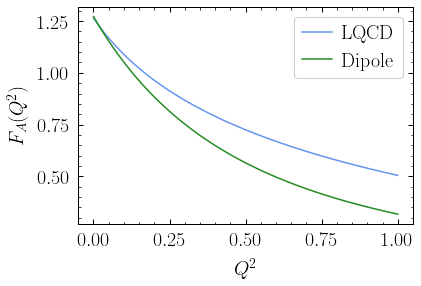

In [128]:
Q2arr = np.linspace(0,1.0,100)
FA_LQCD = [-FA_lattice(Qsq) for Qsq in Q2arr]
FA_dip = [-FA_dipole(Qsq) for Qsq in Q2arr]

LQCD_tmu = [np.zeros_like(avgQ2[0]),np.zeros_like(avgQ2[0]),np.zeros_like(avgQ2[0])]
dipole_tmu = [np.zeros_like(avgQ2[0]),np.zeros_like(avgQ2[0]),np.zeros_like(avgQ2[0])]

for i in range(0,3):
    LQCD_tmu[i] = [-FA_lattice(Qsq) for Qsq in avgQ2[i]]
    dipole_tmu[i] = [-FA_dipole(Qsq) for Qsq in avgQ2[i]]

plt.plot(Q2arr,FA_LQCD,label='LQCD')
plt.plot(Q2arr, FA_dip,label='Dipole')
plt.xlabel(r'$Q^{2}$')
plt.ylabel(r'$F_{A}(Q^{2})$')
plt.legend()

Text(0.5, 1.1, '$\\langle Q^{2}(T_{\\mu})\\rangle = \\int Q^{2}(E_{\\nu},T_{\\mu})\\Phi(E_{\\nu})dE_{\\nu}\\Theta(E_{\\nu} - T_{\\mu} - m_{\\mu})$')

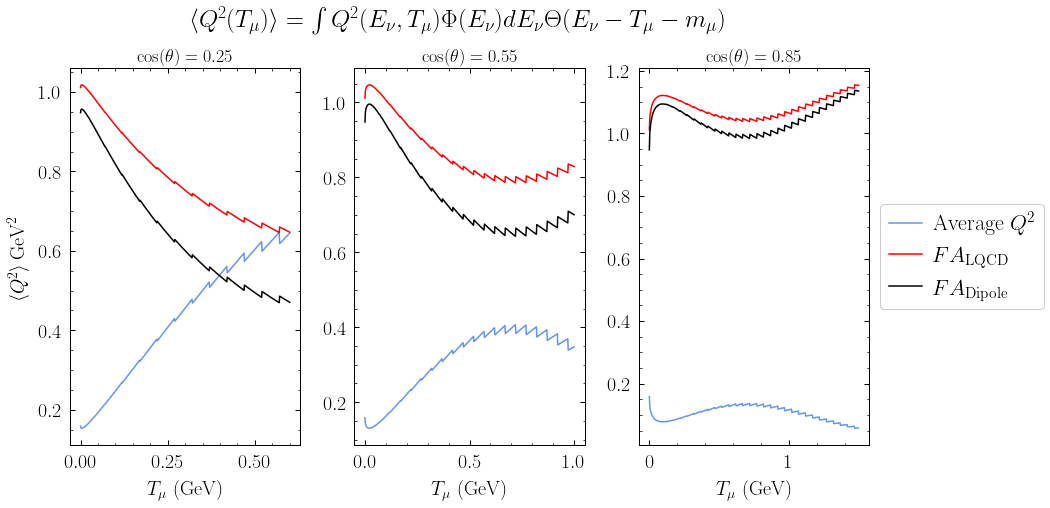

In [137]:
fig,ax = plt.subplots(1,3,figsize=(12,6))
fig.tight_layout()


for i in range(0,3):
    ax[i].plot(ts[i], avgQ2[i],label='Average $Q^{2}$')
    ax[i].set_xlabel(r'$T_{\mu}$ (GeV)')
    
    ax[i].plot(ts[i],LQCD_tmu[i],color='red',label=r'$FA_{\rm{LQCD}}$')
    ax[i].plot(ts[i],dipole_tmu[i],color='black',label=r'$FA_{\rm{Dipole}}$')
    #ax[i].plot(ts[i],np.array(LQCD_tmu[i])-np.array(dipole_tmu[i]),color='black',label = '$FA_{LQCD} - FA_{Dipole}$')

ax[0].set_title(r'$\cos(\theta) = 0.25$',fontsize=18)
ax[1].set_title(r'$\cos(\theta) = 0.55$',fontsize=18)
ax[2].set_title(r'$\cos(\theta) = 0.85$',fontsize=18)

ax[2].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 22})
    
ax[0].set_ylabel(r'$\langle Q^{2}\rangle \,\rm{GeV}^{2}$')

#fig.suptitle(r'Average $Q^{2}$ Integrated over MiniBooNE flux',fontsize=25,y=1.1)
fig.suptitle(r'$\langle Q^{2}(T_{\mu})\rangle = \int Q^{2}(E_{\nu},T_{\mu})\Phi(E_{\nu})dE_{\nu}\Theta(E_{\nu} - T_{\mu} - m_{\mu})$',fontsize=25,y=1.1)

In [84]:
norm

2.5967880227837005e-11